读取 **加州房价** 数据

In [4]:
import pandas as pd #导入Pandas，用于数据读取和处理
# 读入房价数据，示例代码中的文件地址为internet链接，读者也可以下载该文件到本机进行读取
# 如，当数据集和代码文件位于相同本地目录，路径名应为"./house.csv"，或直接放"house.csv"亦可
df_housing = pd.read_csv("../input/housecsv/house.csv") 
df_housing.head #显示加州房价数据

<bound method NDFrame.head of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -114.31     34.19                  15         5612            1283   
1        -114.47     34.40                  19         7650            1901   
2        -114.56     33.69                  17          720             174   
3        -114.57     33.64                  14         1501             337   
4        -114.57     33.57                  20         1454             326   
...          ...       ...                 ...          ...             ...   
16995    -124.26     40.58                  52         2217             394   
16996    -124.27     40.69                  36         2349             528   
16997    -124.30     41.84                  17         2677             531   
16998    -124.30     41.80                  19         2672             552   
16999    -124.35     40.54                  52         1820             300   

       population  ho

In [5]:
X = df_housing.drop("median_house_value",axis = 1) #构建特征集X
y = df_housing.median_house_value #构建标签集y

拆分数据集为 训练集 和 测试集

In [6]:
from sklearn.model_selection import train_test_split #导入数据集拆分工具
X_train, X_test, y_train, y_test = train_test_split(X, y, 
         test_size=0.2, random_state=0) #以80%/20%的比例进行数据集的拆分

用线性回归模型训练机器

In [8]:
from sklearn.linear_model import LinearRegression #导入线性回归算法模型
model = LinearRegression() #使用线性回归算法
model.fit(X_train, y_train) #用训练集数据，训练机器，拟合函数，确定参数

LinearRegression()

预测测试集的房价，评估预测结果

In [9]:
y_pred = model.predict(X_test) #预测测试集的Y值
print ('房价的真值(测试集)',y_test)
print ('预测的房价(测试集)',y_pred)

房价的真值(测试集) 3873     171400
3625     189600
3028     500001
13814    229400
15398    163400
          ...  
1363     212500
7947     210500
14574    142900
10009    128300
9149      84700
Name: median_house_value, Length: 3400, dtype: int64
预测的房价(测试集) [211157.06335418 218581.64298574 465317.31295564 ... 201751.2396963
 160873.51846958 138847.26913352]


In [10]:
print("给预测评分：", model.score(X_test, y_test)) #评估预测结果

给预测评分： 0.6321014171579453


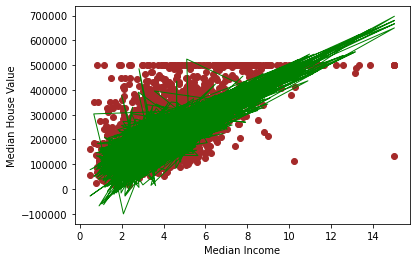

In [11]:
import matplotlib.pyplot as plt #导入matplotlib画图库
#用散点图显示家庭收入中位数和房价中位数的分布
plt.scatter(X_test.median_income, y_test,  color='brown')
#画出回归函数(从特征到预测标签)
plt.plot(X_test.median_income, y_pred, color='green', linewidth=1)
plt.xlabel('Median Income') #X轴-家庭收入中位数
plt.ylabel('Median House Value') #Y轴-房价中位数
plt.show() #显示房价分布和机器习得的函数图形